In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

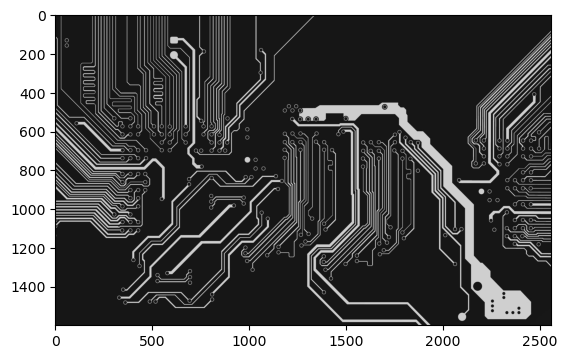

In [9]:
img=cv2.imread("C:\\Users\\dell\\OneDrive\\Pictures\\wallpaperflare.com_wallpaper (8).jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

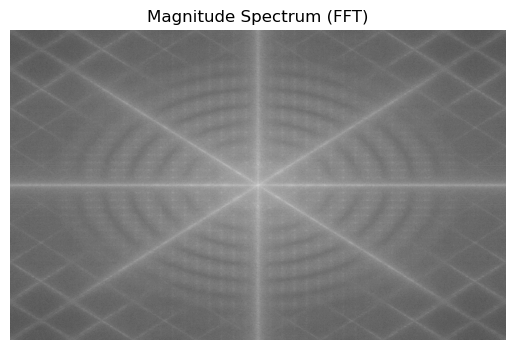

In [10]:
f_transform = np.fft.fft2(gray)
f_shift = np.fft.fftshift(f_transform)

# Compute the magnitude spectrum (amplitude)
magnitude_spectrum = np.log(np.abs(f_shift) + 1)  # Adding 1 to avoid log(0)

# Display the magnitude spectrum
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum (FFT)")
plt.axis('off')
plt.show()

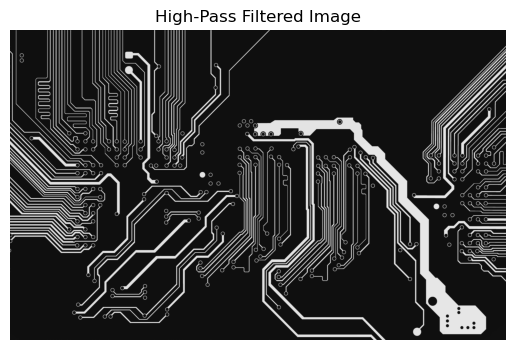

In [11]:
# Apply the Butterworth high-pass filter
D0 = 30  # Cutoff frequency (adjust as needed)
n = 2    # Order of the filter (adjust as needed)
rows, cols = gray.shape
crow, ccol = rows // 2, cols // 2

# Create the filter
mask = np.zeros((rows, cols), dtype=np.float32)
for i in range(rows):
    for j in range(cols):
        mask[i, j] = 1 / (1 + ((i - crow) ** 2 + (j - ccol) ** 2) / (D0 ** (2 * n)))

# Apply the filter in the frequency domain
f_transform = np.fft.fft2(gray)
f_shift = np.fft.fftshift(f_transform)
filtered_shift = f_shift * mask
filtered_image = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_shift)))

# Display the filtered image
plt.imshow(filtered_image, cmap='gray')
plt.title("High-Pass Filtered Image")
plt.axis('off')
plt.show()

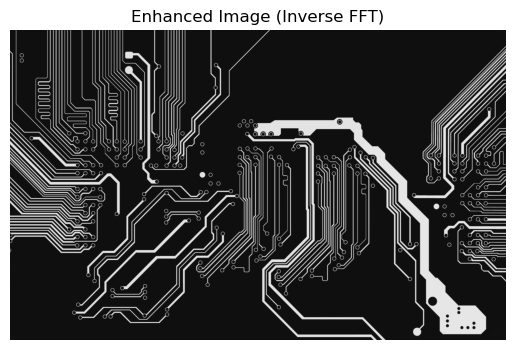

In [12]:
# Apply the inverse FFT
filtered_image = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_shift)))

# Display the enhanced image
plt.imshow(filtered_image, cmap='gray')
plt.title("Enhanced Image (Inverse FFT)")
plt.axis('off')
plt.show()

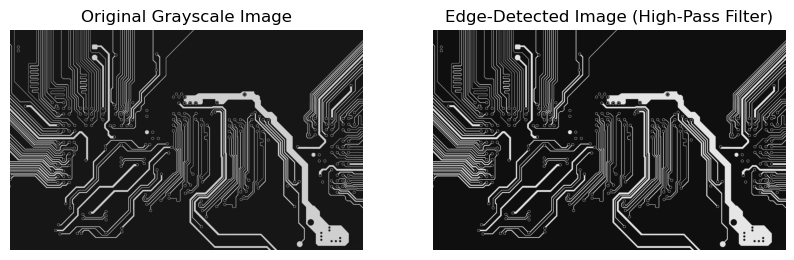

In [13]:
# Apply the FFT
f_transform = np.fft.fft2(gray)
f_shift = np.fft.fftshift(f_transform)

# Create a high-pass filter (Butterworth in this example)
D0 = 30  # Cutoff frequency (adjust as needed)
n = 2    # Order of the filter (adjust as needed)
rows, cols = gray.shape
crow, ccol = rows // 2, cols // 2

# Create the filter
mask = np.zeros((rows, cols), dtype=np.float32)
for i in range(rows):
    for j in range(cols):
        mask[i, j] = 1 / (1 + ((i - crow) ** 2 + (j - ccol) ** 2) / (D0 ** (2 * n)))

# Apply the filter in the frequency domain
filtered_shift = f_shift * mask

# Compute the inverse FFT
filtered_image = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_shift)))

# Display the original and filtered images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title("Edge-Detected Image (High-Pass Filter)")
plt.axis('off')

plt.show()